In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import statsmodels.formula.api as smf

In [100]:
data = pd.read_csv('https://raw.githubusercontent.com/vc1492a/Yelp-Challenge-Dataset/master/Prepped%20Data/output.csv')
data.iloc[0:6,]

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,"202 McClure St Dravosburg, PA 15034",40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,"1 Ravine St Dravosburg, PA 15034",40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,...,0,0,0,0,0,0,0,0,0,0
3,cE27W9VPgO88Qxe4ol6y_g,Bethel Park,"1530 Hamilton Rd Bethel Park, PA 15234",40.354116,-80.014660,Cool Springs Golf Center,5,2.5,PA,business,...,0,0,0,0,0,0,0,9,1,0
4,HZdLhv6COCleJMo7nPl-RA,Pittsburgh,"301 South Hills Village Pittsburgh, PA 15241",40.357620,-80.059980,Verizon,5,2.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
5,mVHrayjG3uZ_RLHkLj-AMg,rankin,"414 Hawkins Ave rankin, PA 15104",40.413464,-79.880247,Emil's Lounge,20,5.0,PA,business,...,0,0,0,0,0,0,0,23,1,1


In [349]:
print data.shape

(72742, 89)


In [78]:
data["Number_of_Tip_Likes"].value_counts()

0     67652
1      3500
2       850
3       337
4       162
5        84
6        44
7        32
9        18
8        18
10       11
11       11
15        6
13        4
14        4
12        3
31        2
23        1
16        1
17        1
18        1
Name: Number_of_Tip_Likes, dtype: int64

## Understanding the Dataset

 FieldName|Type|Description
 ---------|----|-----------
business_id|integer (0 or 1)|business_id
city|string|city
full_address|string|full_address
latitude|double|latitude
longitude|double|longitude
name|string|name of restaurant
review_count|integer|number of reviews
stars|double (rounded to nearest 0.5)|rating of the restaurant
state|string|state
type|string|all of these are labeled as business
Sunday_Open|double (time)|Sunday_Open
Sunday_Close|double (time)|Sunday_Close
Monday_Open|double (time)|Monday_Open
Monday_Close|double (time)|Monday_Close
Tuesday_Open|double (time)|Tuesday_Open
Tuesday_Close|double (time)|Tuesday_Close
Wednesday_Open|double (time)|Wednesday_Open
Wednesday_Close|double (time)|Wednesday_Close
Thursday_Open|double (time)|Thursday_Open
Thursday_Close|double (time)|Thursday_Close
Friday_Open|double (time)|Friday_Open
Friday_Close|double (time)|Friday_Close
Saturday_Open|double (time)|Saturday_Open
Saturday_Close|double (time)|Saturday_Close
Noise Level|string|Average, Quiet, Loud, Very Loud
Attire|string|Casual, Dressy, Formal
Alcohol|string|Full Bar, Beer and Wine, None
Price_Range|integer (1 to 4)|1 (cheap) to 4 (expensive)
Delivery|integer (0 or 1)|0 = N, 1 = Y
Outdoor_Seating|integer (0 or 1)|0 = N, 1 = Y
Drive-Thru|integer (0 or 1)|0 = N, 1 = Y
Good_for_Groups|integer (0 or 1)|0 = N, 1 = Y
Has_TV|integer (0 or 1)|0 = N, 1 = Y
Caters|integer (0 or 1)|0 = N, 1 = Y
Waiter_Service|integer (0 or 1)|0 = N, 1 = Y
Good_for_Kids|integer (0 or 1)|0 = N, 1 = Y
Accepts_Credit_Cards|integer (0 or 1)|0 = N, 1 = Y
Takes_Reservations|integer (0 or 1)|0 = N, 1 = Y
Wi_Fi|string|No, Free, Paid
Happy_Hour|integer (0 or 1)|0 = N, 1 = Y
Good_for_Dancing|integer (0 or 1)|0 = N, 1 = Y
Smoking|integer (0 or 1)|Outdoor, No, Yes
BYOB|integer (0 or 1)|0 = N, 1 = Y
Corkage|integer (0 or 1)|0 = N, 1 = Y
Take_Out|integer (0 or 1)|0 = N, 1 = Y
Coat_Check|integer (0 or 1)|0 = N, 1 = Y
Parking_Street|integer (0 or 1)|0 = N, 1 = Y
Parking_Valet|integer (0 or 1)|0 = N, 1 = Y
Parking_Lot|integer (0 or 1)|0 = N, 1 = Y
Parking_Garage|integer (0 or 1)|0 = N, 1 = Y
Parking_Validated|integer (0 or 1)|0 = N, 1 = Y
Music_DJ|integer (0 or 1)|0 = N, 1 = Y
Music_Karaoke|integer (0 or 1)|0 = N, 1 = Y
Music_Video|integer (0 or 1)|0 = N, 1 = Y
Music_Live|integer (0 or 1)|0 = N, 1 = Y
Music_Jukebox|integer (0 or 1)|0 = N, 1 = Y
Music_Background_Music|integer (0 or 1)|0 = N, 1 = Y
Is_Restaurants|integer (0 or 1)|0 = N, 1 = Y (is it a restaurant)
Sandwiches|integer (0 or 1)|0 = N, 1 = Y
Fast Food|integer (0 or 1)|0 = N, 1 = Y
Nightlife|integer (0 or 1)|0 = N, 1 = Y
Pizza|integer (0 or 1)|0 = N, 1 = Y
Bars|integer (0 or 1)|0 = N, 1 = Y
Mexican|integer (0 or 1)|0 = N, 1 = Y
Food|integer (0 or 1)|0 = N, 1 = Y
American (Traditional)|integer (0 or 1)|0 = N, 1 = Y
Burgers|integer (0 or 1)|0 = N, 1 = Y
Chinese|integer (0 or 1)|0 = N, 1 = Y
Italian|integer (0 or 1)|0 = N, 1 = Y
American (New)|integer (0 or 1)|0 = N, 1 = Y
Breakfast & Brunch|integer (0 or 1)|0 = N, 1 = Y
Thai|integer (0 or 1)|0 = N, 1 = Y
Indian|integer (0 or 1)|0 = N, 1 = Y
Sushi Bars|integer (0 or 1)|0 = N, 1 = Y
Korean|integer (0 or 1)|0 = N, 1 = Y
Mediterranean|integer (0 or 1)|0 = N, 1 = Y
Japanese|integer (0 or 1)|0 = N, 1 = Y
Seafood|integer (0 or 1)|0 = N, 1 = Y
Middle Eastern|integer (0 or 1)|0 = N, 1 = Y
Pakistani|integer (0 or 1)|0 = N, 1 = Y
Barbeque|integer (0 or 1)|0 = N, 1 = Y
Vietnamese|integer (0 or 1)|0 = N, 1 = Y
Asian Fusion|integer (0 or 1)|0 = N, 1 = Y
Diners|integer (0 or 1)|0 = N, 1 = Y
Greek|integer (0 or 1)|0 = N, 1 = Y
Vegetarian|integer (0 or 1)|0 = N, 1 = Y
Number_of_Checkins|integer|Number_of_Checkins
Number_of_Tips|integer|Number_of_Tips
Number_of_Tip_Likes|integer (0 to 18)|Number_of_Tip_Like

In [79]:
data_rest = data[data["Is_Restaurants"] == 1]
data_rest.shape

(22264, 89)

In [81]:
data_rest['full_address']

0              4734 Lebanon Church Rd Dravosburg, PA 15034
5                         414 Hawkins Ave rankin, PA 15104
7            141 Hawthorne St Greentree Carnegie, PA 15106
14                 2100 Washington Pike Carnegie, PA 15106
18                  1201 Washington Ave Carnegie, PA 15106
19                  1073 Washington Ave Carnegie, PA 15106
20                 202 3rd Ave Carnegie Carnegie, PA 15106
22               215 E Main St Carnegie Carnegie, PA 15106
26                          Raceway Plz Carnegie, PA 15106
28               214 E Main St Carnegie Carnegie, PA 15106
30                  2180 Greentree Rd Pittsburgh, PA 15220
32               200 E Main St Carnegie Carnegie, PA 15106
33                300 Davis Blvd Etna Pittsburgh, PA 15275
34              820 Amity St Homestead Homestead, PA 15120
39        650 E  Waterfront Dr Homestead Munhall, PA 15120
44             122 W 8th Ave Homestead Homestead, PA 15120
45       180 E Waterfront Dr Homestead Homestead, PA 151

In [101]:
#Create zipcode
data_rest.loc[:,"Zipcode"] = data_rest["full_address"].apply(lambda x: x[-5:])


In [91]:
data_rest["full_address"].isnull().sum()

0

In [99]:
data_rest["full_address"].iloc[0:3,]

0      4734 Lebanon Church Rd Dravosburg, PA 15034
5                 414 Hawkins Ave rankin, PA 15104
7    141 Hawthorne St Greentree Carnegie, PA 15106
Name: full_address, dtype: object

In [106]:
import os

os.chdir('/Users/Lavitsky/Desktop/DAT_03_20_LINA_LAVITSKY')

In [109]:
zipcode_data = pd.read_csv('Zipcode.csv')
zipcode_data.head()

,Zipcode,NY Neighborhood,Borough
0,10453,Central Bronx,Bronx
1,10458,Bronx Park and Fordham,Bronx
2,10451,High Bridge and Morrisania,Bronx
3,10454,Hunts Point and Mott Haven,Bronx
4,10463,Kingsbridge and Riverdale,Bronx


In [119]:
data_join = data_rest.merge(zipcode_data, on="Zipcode", how = 'left')
data_join.head()

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes,Zipcode,NY Neighborhood,Borough
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,15034,NaN,NaN
1,mVHrayjG3uZ_RLHkLj-AMg,rankin,"414 Hawkins Ave rankin, PA 15104",40.413464,-79.880247,Emil's Lounge,20,5.0,PA,business,...,0,0,0,0,23,1,1,15104,NaN,NaN
2,KayYbHCt-RkbGcPdGOThNg,Carnegie,"141 Hawthorne St Greentree Carnegie, PA 15106",40.415517,-80.067534,Alexion's Bar & Grill,21,4.0,PA,business,...,0,0,0,0,55,2,0,15106,NaN,NaN
3,wJr6kSA5dchdgOdwH6dZ2w,Carnegie,"2100 Washington Pike Carnegie, PA 15106",40.387512,-80.093215,Kings Family Restaurant,8,3.5,PA,business,...,0,0,0,0,15,1,0,15106,NaN,NaN
4,fNGIbpazjTRdXgwRY_NIXA,Carnegie,"1201 Washington Ave Carnegie, PA 15106",40.396469,-80.084942,Rocky's Lounge,7,4.0,PA,business,...,0,0,0,0,11,2,0,15106,NaN,NaN


In [130]:
data[data["city"] == "Oakland"]

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
10362,Iz1CMuIf09OO6kk9GXetKA,Oakland,"3611 Forbes Ave Oakland Oakland Oakland, PA 15213",40.440896,-79.958105,Supercuts,5,3.0,PA,business,...,0,0,0,0,0,0,0,0,0,0
36605,jOvre78unGobEEgDiJwH7A,Oakland,"3800 Forbes Ave Oakland Oakland, PA 15213",40.441551,-79.956918,Rue 21,3,3.0,PA,business,...,0,0,0,0,0,0,0,6,1,0
50115,09r7xwM1OTEM2hnAM8WPFA,Oakland,"3805 Forbes Ave Oakland Oakland, PA 15213",40.441879,-79.956889,Noodles & Company,50,3.0,PA,business,...,0,0,0,1,0,0,0,126,6,0


In [144]:
data_rest[data_rest["state"]=="AZ"]["city"].value_counts()

Phoenix                      2903
Scottsdale                   1165
Mesa                          864
Tempe                         783
Chandler                      638
Glendale                      519
Gilbert                       398
Peoria                        278
Surprise                      163
Goodyear                      135
Avondale                      129
Queen Creek                   105
Casa Grande                    79
Cave Creek                     69
Apache Junction                58
Maricopa                       57
Buckeye                        53
Fountain Hills                 53
Wickenburg                     40
Anthem                         36
Litchfield Park                33
Sun City                       33
San Tan Valley                 27
Tolleson                       27
Paradise Valley                26
Laveen                         25
Carefree                       20
Florence                       19
Gold Canyon                    17
El Mirage     

In [143]:
data_rest["state"].value_counts()

AZ     8857
NV     5518
NC     2239
PA     1549
EDH    1155
WI     1103
QC      611
BW      395
ON      323
IL      299
SC      124
MLN      71
ELN       7
RP        5
FIF       3
KHL       1
NW        1
NM        1
TX        1
Name: state, dtype: int64

In [145]:
import matplotlib.pyplot as plt

(array([   24.,   171.,   522.,  1368.,     0.,  2834.,  4591.,  4421.,
         1660.,   192.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

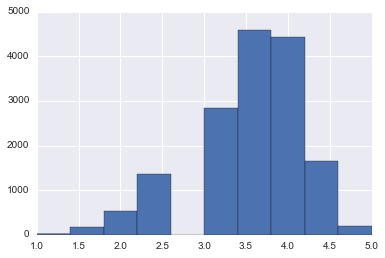

In [186]:
plt.hist(data2["stars"])

In [189]:
data2["Noise Level"].value_counts()

average      10757
quiet         3424
loud          1174
very_loud      428
Name: Noise Level, dtype: int64

In [181]:
data1.isnull().sum()

stars                    0
review_count             0
Noise Level           5131
Attire                1831
Price_Range           1323
Delivery              2200
Good_for_Groups       1631
Waiter_Service        3503
Number_of_Checkins       0
Take_Out              1692
Number_of_Tips           0
dtype: int64

In [283]:
data2 = data1.dropna()

In [185]:
data2.describe()

,stars,review_count,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips
count,15783.000000,15783.000000,15783.000000,15783.000000,15783.000000,15783.000000,15783.000000,15783.000000,15783.000000
mean,3.511943,85.633530,1.597415,0.186720,0.906228,0.606222,256.716784,0.930622,21.465881
std,0.679180,175.480675,0.619457,0.389699,0.291520,0.488602,578.876023,0.254105,43.022421
min,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,16.000000,1.000000,0.000000,1.000000,0.000000,29.000000,1.000000,3.000000
50%,3.500000,38.000000,2.000000,0.000000,1.000000,1.000000,88.000000,1.000000,9.000000
75%,4.000000,90.000000,2.000000,0.000000,1.000000,1.000000,250.000000,1.000000,23.000000
max,5.000000,5642.000000,4.000000,1.000000,1.000000,1.000000,16641.000000,1.000000,1148.000000


In [298]:
data2.isnull().sum()

stars                 0
state                 0
review_count          0
Noise Level           0
Attire                0
Price_Range           0
Delivery              0
Good_for_Groups       0
Waiter_Service        0
Number_of_Checkins    0
Take_Out              0
Number_of_Tips        0
overall_rating        0
log_tips              0
log_reviews           0
dtype: int64

In [191]:
pd.crosstab(index=data2["Noise Level"], 
                           columns=data2["stars"])

stars,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Noise Level,,,,,,,,,
average,15,99,291,837,1892,3266,3155,1112,90
loud,4,22,78,174,283,327,217,59,10
quiet,5,32,111,266,541,886,1012,480,91
very_loud,0,18,42,91,118,112,37,9,1


In [305]:
pd.crosstab(index=data2["state"], 
                           columns=data2["stars"])

stars,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
state,,,,,,,,,
AZ,13,85,238,620,1221,1853,1875,654,76
BW,0,0,0,4,13,26,25,21,8
EDH,0,2,4,11,59,134,189,108,14
ELN,0,0,0,0,0,1,0,0,0
FIF,0,0,0,0,0,0,1,0,0
IL,0,0,9,16,53,73,52,16,2
MLN,0,0,0,0,2,6,8,17,1
NC,5,16,43,131,315,502,475,126,14
NM,0,0,0,0,1,0,0,0,0


In [306]:
data3 = data2[data2["state"].isin(["AZ", "NC", "NV","PA", "WI"])]
data3.describe()

,stars,review_count,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips,overall_rating,log_tips,log_reviews
count,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,1.432500e+04,14325.000000
mean,3.494834,91.666387,1.567818,0.183665,0.906736,0.588761,278.991763,0.947644,23.304014,0.387923,-inf,3.744923
std,0.677748,182.652176,0.608361,0.387224,0.290812,0.492076,602.432149,0.222752,44.632931,0.487294,NaN,1.221368
min,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-inf,1.098612
25%,3.000000,17.000000,1.000000,0.000000,1.000000,0.000000,36.000000,1.000000,4.000000,0.000000,1.386294e+00,2.833213
50%,3.500000,42.000000,2.000000,0.000000,1.000000,1.000000,102.000000,1.000000,10.000000,0.000000,2.302585e+00,3.737670
75%,4.000000,98.000000,2.000000,0.000000,1.000000,1.000000,278.000000,1.000000,25.000000,1.000000,3.218876e+00,4.584967
max,5.000000,5642.000000,4.000000,1.000000,1.000000,1.000000,16641.000000,1.000000,1148.000000,1.000000,7.045777e+00,8.637994


In [311]:
data4 = data_rest[data_rest["state"].isin(["AZ", "NC", "NV","PA", "WI"])].dropna()
data4.head()

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes,Zipcode
18738,N8Q2s-Snz2vL79zB3rEEug,Madison,1201 Williamson St Williamson - Marquette Madi...,43.083253,-89.364316,The Weary Traveler Freehouse,359,4.0,WI,business,...,0,0,0,0,0,0,500,44,1,53703
18857,OFBJtqWGSx6n6CchtVmoRw,Phoenix,"3146 E Camelback Rd Phoenix, AZ 85016",33.510055,-112.014641,Delux,755,4.0,AZ,business,...,0,0,0,0,0,0,1860,143,2,85016


In [348]:
data3.head()

,stars,state,review_count,Noise Level,Attire,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips,overall_rating,log_tips,log_reviews
0,4.5,PA,4,average,casual,1.0,0.0,1.0,0.0,0,1.0,0,1,-inf,1.386294
5,5.0,PA,20,average,casual,1.0,0.0,1.0,1.0,23,1.0,1,1,0.000000,2.995732
7,4.0,PA,21,loud,casual,1.0,0.0,1.0,1.0,55,1.0,2,1,0.693147,3.044522
18,4.0,PA,7,average,casual,1.0,0.0,1.0,1.0,11,1.0,2,1,0.693147,1.945910
19,4.5,PA,58,average,casual,1.0,0.0,0.0,1.0,108,1.0,5,1,1.609438,4.060443


In [347]:
dummies_state = pd.get_dummies(data3['state'], prefix='state')
dummies_noise = pd.get_dummies(data4['Noise Level'],prefix = 'Noise')
dummies_attire = pd.get_dummies(data4['Attire'], prefix = 'Attire')
dummies_price = pd.get_dummies(data4['Price_Range'], prefix = 'Price')
dummies_waiter = pd.get_dummies(data4['Waiter_Service'], prefix = 'Waiter')
all_dummies = pd.concat([dummies_state, dummies_noise, dummies_attire, dummies_price, dummies_waiter], axis =1)
list(all_dummies)
['state_AZ',
 'state_NC',
 'state_NV',
 'state_PA',
 'Noise_average',
 'Noise_loud',
 'Noise_quiet',
 'Noise_very_loud',
 'Attire_casual',
 'Attire_dressy',
 'Attire_formal',
 'Price_1.0',
 'Price_2.0',
 'Price_3.0',
 'Price_4.0',
 'Waiter_0.0',
 'Waiter_1.0']

['state_AZ',
 'state_NC',
 'state_NV',
 'state_PA',
 'state_WI',
 'Noise_average',
 'Noise_loud',
 'Noise_quiet',
 'Noise_very_loud',
 'Attire_casual',
 'Attire_dressy',
 'Attire_formal',
 'Price_1.0',
 'Price_2.0',
 'Price_3.0',
 'Price_4.0',
 'Waiter_0.0',
 'Waiter_1.0']

In [343]:
cols_to_keep2 = ['log_tips', 'log_reviews']
independent_var = pd.concat([data_4[cols_to_keep], all_dummies], axis =1)
y = data4['overall_rating']
                            
print independent_var.head()
independent_var['intercept'] = 1.0 #need to manually insert intercept column

#train_cols = data2.columns[1:]


In [340]:
data4.head()

,stars,state,review_count,Noise Level,Attire,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,...,state_NV,state_PA,state_WI,Noise_average,Noise_loud,Noise_quiet,Noise_very_loud,Attire_casual,Attire_dressy,Attire_formal
0,4.5,PA,4,average,casual,1.0,0.0,1.0,0.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,5.0,PA,20,average,casual,1.0,0.0,1.0,1.0,23,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,4.0,PA,21,loud,casual,1.0,0.0,1.0,1.0,55,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
18,4.0,PA,7,average,casual,1.0,0.0,1.0,1.0,11,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19,4.5,PA,58,average,casual,1.0,0.0,0.0,1.0,108,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [307]:
pd.crosstab(index=data3["state"], 
                           columns=data3["stars"])

stars,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
state,,,,,,,,,
AZ,13,85,238,620,1221,1853,1875,654,76
NC,5,16,43,131,315,502,475,126,14
NV,4,49,159,389,757,1257,1081,417,38
PA,0,7,22,81,176,350,343,138,18
WI,1,7,20,75,137,235,226,69,7


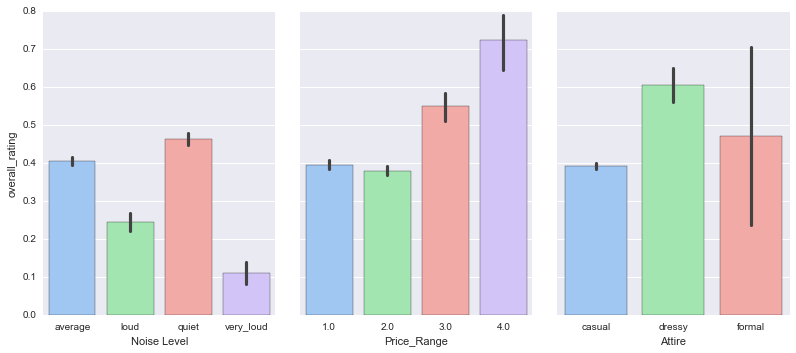

In [275]:
g = sb.PairGrid(data2, x_vars=["Noise Level", "Price_Range", "Attire"],
                y_vars =["overall_rating"],
               aspect = .75, size = 5)

g.map(sb.barplot, palette = "pastel");

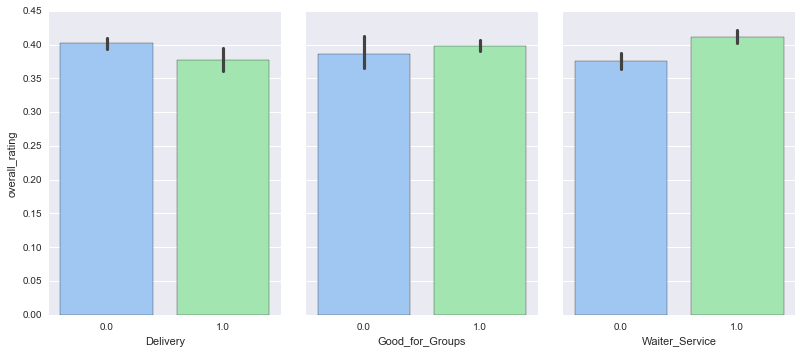

In [278]:
g = sb.PairGrid(data2, x_vars=["Delivery", "Good_for_Groups", "Waiter_Service"],
                y_vars =["overall_rating"],
               aspect = .75, size = 5)

g.map(sb.barplot, palette = "pastel");

In [ ]:
g = sb.PairGrid(data2, x_vars=["Delivery", "Good_for_Groups", "Waiter_Service"],
                y_vars =["overall_rating"],
               aspect = .75, size = 5)

g.map(sb.barplot, palette = "pastel");

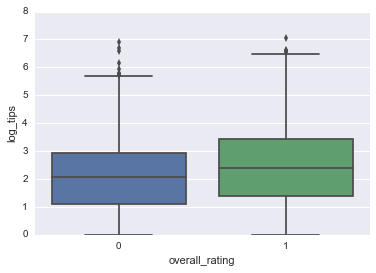

In [297]:
sb.boxplot(x="overall_rating", y="log_tips", data=data2);


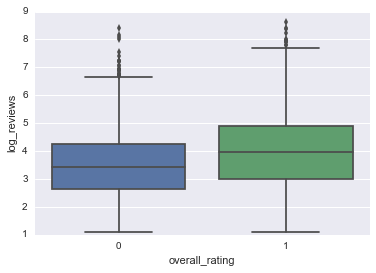

In [296]:
sb.boxplot(x="overall_rating", y="log_reviews", data=data2);

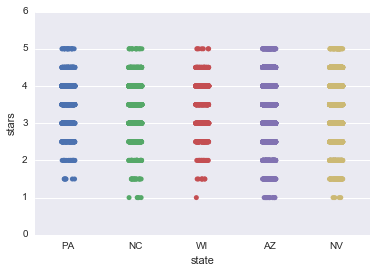

In [314]:
sb.stripplot(x="state", y="stars",data=data3, jitter=True)

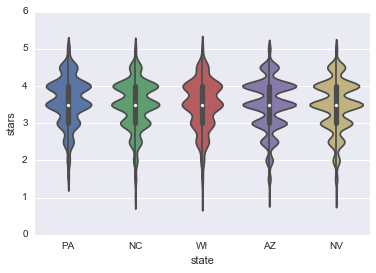

In [316]:
sb.violinplot(x="state", y="stars",data=data3)

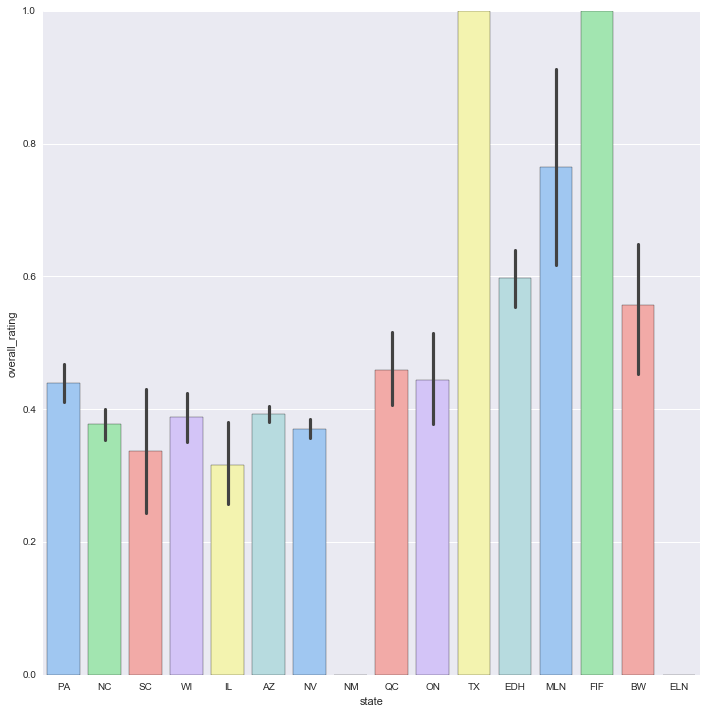

In [309]:
g = sb.PairGrid(data2, x_vars=["state"],
                y_vars =["overall_rating"],
               size = 10)

g.map(sb.barplot, palette = "pastel");

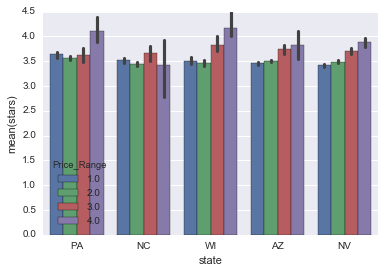

In [317]:
sb.barplot(x="state", y="stars",hue="Price_Range", data=data3)

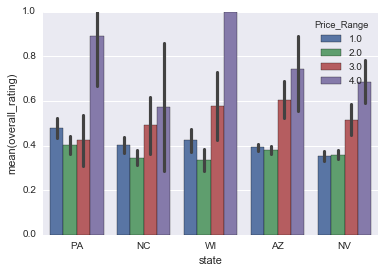

In [318]:
sb.barplot(x="state", y="overall_rating",hue="Price_Range", data=data3)

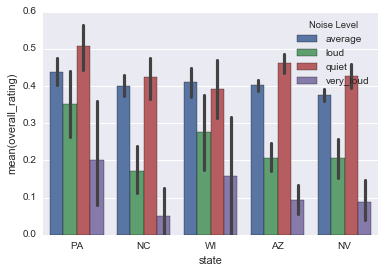

In [319]:
sb.barplot(x="state", y="overall_rating",hue="Noise Level", data=data3)

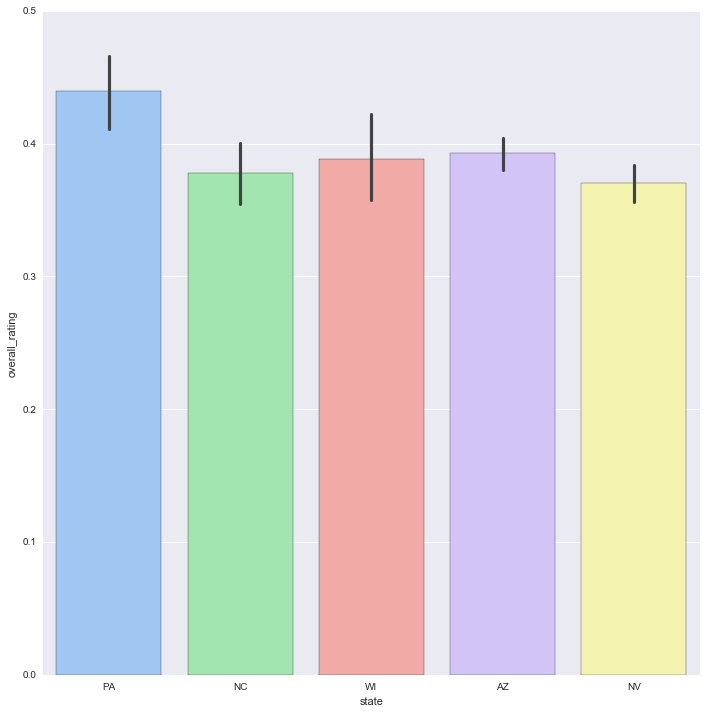

In [308]:
g = sb.PairGrid(data3, x_vars=["state"],
                y_vars =["overall_rating"],
               size = 10)

g.map(sb.barplot, palette = "pastel");

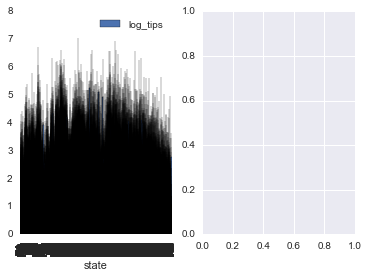

In [331]:
f, ax = plt.subplots(1,2)
#data3.plot(kind="bar", x="state", y="log_tips", ax=ax[0])
#sb.factorplot(x="state",y="overall_rating",data=data3,ax=axs[0])

In [290]:
data2["log_tips"]=np.log(data2["Number_of_Tips"])

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [294]:
data2["log_reviews"]=np.log(data2["review_count"])

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [286]:
data2["overall_rating"]=data2["stars"].apply(lambda x: 1 if x>3.5 else 0)

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [201]:
data2.head()

,stars,review_count,Noise Level,Attire,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips,overall_rating
0,4.5,4,average,casual,1.0,0.0,1.0,0.0,0,1.0,0,1
5,5.0,20,average,casual,1.0,0.0,1.0,1.0,23,1.0,1,1
7,4.0,21,loud,casual,1.0,0.0,1.0,1.0,55,1.0,2,1
18,4.0,7,average,casual,1.0,0.0,1.0,1.0,11,1.0,2,1
19,4.5,58,average,casual,1.0,0.0,0.0,1.0,108,1.0,5,1


In [203]:
data2["overall_rating"].value_counts()

0    9510
1    6273
Name: overall_rating, dtype: int64

In [194]:
from collections import Counter

In [197]:
Counter(data2["stars"])

Counter({1.0: 24,
         1.5: 171,
         2.0: 522,
         2.5: 1368,
         3.0: 2834,
         3.5: 4591,
         4.0: 4421,
         4.5: 1660,
         5.0: 192})

In [ ]:
sb.factorplot(x='Noise Level', 
              y='stars',
              kind='bar',
              data = data)

In [157]:
#cols_to_keep = ['stars', 'review_count', 'city', 'state','business_id','Noise Level', 'Attire', 'Price_Range', 'Delivery', 'Good_for_Groups', 'Waiter_Service','Number_of_Checkins','Take_Out','Number_of_Tips']

In [281]:
cols_to_keep = ['stars','state', 'review_count','Noise Level', 'Attire', 'Price_Range', 'Delivery', 'Good_for_Groups', 'Waiter_Service','Number_of_Checkins','Take_Out','Number_of_Tips']

In [282]:
data1 = data_rest[cols_to_keep]
data1.head()

,stars,state,review_count,Noise Level,Attire,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips
0,4.5,PA,4,average,casual,1.0,0.0,1.0,0.0,0,1.0,0
5,5.0,PA,20,average,casual,1.0,0.0,1.0,1.0,23,1.0,1
7,4.0,PA,21,loud,casual,1.0,0.0,1.0,1.0,55,1.0,2
14,3.5,PA,8,NaN,casual,1.0,0.0,1.0,1.0,15,1.0,1
18,4.0,PA,7,average,casual,1.0,0.0,1.0,1.0,11,1.0,2


In [165]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13f8b4f50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x143a19650>]], dtype=object)

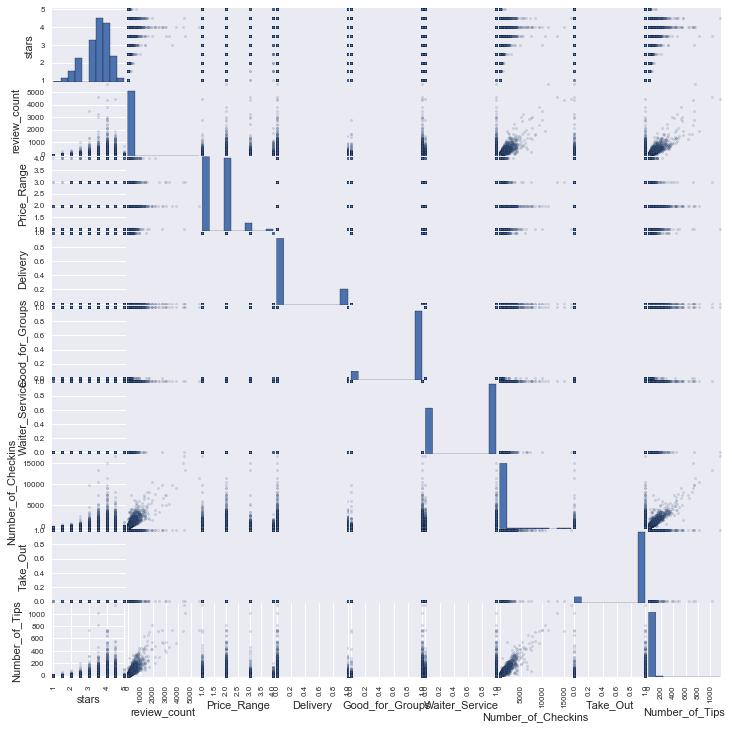

In [167]:
scatter_matrix(data1, alpha=0.2, figsize=(12, 12))

In [351]:
df = pd.read_csv('/Users/Lavitsky/Desktop/DAT_03_20_LINA_LAVITSKY/Final Project/yelp_academic_dataset_review.csv')
df.iloc[0:6,]

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,2aFiy99vNLklCx3T_tGS9A,0,2011-10-10,0,NxL8SIC5yqOdnlXCg18IBg,5.0,If you enjoy service by someone who is as comp...,review,0.0,KpkOkG6RIf4Ra25Lhhxf1A
1,2aFiy99vNLklCx3T_tGS9A,0,2010-12-29,0,pXbbIgOXvLuTi_SPs1hQEQ,5.0,After being on the phone with Verizon Wireless...,review,1.0,bQ7fQq1otn9hKX-gXRsrgA
2,2aFiy99vNLklCx3T_tGS9A,0,2011-04-29,0,wslW2Lu4NYylb1jEapAGsw,5.0,Great service! Corey is very service oriented....,review,0.0,r1NUhdNmL6yU9Bn-Yx6FTw
3,2LfIuF3_sX6uwe-IR-P0jQ,1,2014-07-14,0,GP6YEearUWrzPtQYSF1vVg,5.0,Highly recommended. Went in yesterday looking ...,review,0.0,aW3ix1KNZAvoM8q-WghA3Q
4,2LfIuF3_sX6uwe-IR-P0jQ,0,2014-01-15,0,25RlYGq2s5qShi-pn3ufVA,4.0,I walked in here looking for a specific piece ...,review,0.0,YOo-Cip8HqvKp_p9nEGphw
5,2LfIuF3_sX6uwe-IR-P0jQ,1,2013-04-28,0,Uf1Ki1yyH_JDKhLvn2e4FQ,5.0,What a great place! Modern on Melrose has amaz...,review,2.0,bgl3j8yJcRO-00NkUYsXGQ


In [353]:
df["text"].isnull().sum()

2

In [354]:
cols_to_keep2 = ['business_id','stars','text']
df2 = df[cols_to_keep2]
df2.head()

,business_id,stars,text
0,2aFiy99vNLklCx3T_tGS9A,5.0,If you enjoy service by someone who is as comp...
1,2aFiy99vNLklCx3T_tGS9A,5.0,After being on the phone with Verizon Wireless...
2,2aFiy99vNLklCx3T_tGS9A,5.0,Great service! Corey is very service oriented....
3,2LfIuF3_sX6uwe-IR-P0jQ,5.0,Highly recommended. Went in yesterday looking ...
4,2LfIuF3_sX6uwe-IR-P0jQ,4.0,I walked in here looking for a specific piece ...


In [ ]:
data_join = df2.join(zipcode_data, on="Zipcode", how = 'left')